<center><h1> Classification d'images à l'aide de Convolutional Neural Network (CNN) </h1></center>


# 1. Import des librairies

In [45]:
import tensorflow as tf
import tensorflow.keras as keras
from matplotlib import pyplot

<h1> 2. Chargement du dataset </h1>

In [46]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
        
#print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
#print('Test: X=%s, y=%s' % (x_test.shape, x_test.shape))

# x_train = (50000, 32, 32, 3) y_train = (50000, 1)
# x_test = (10000, 32, 32, 3), y_test = (10000, 1)

Pour les données d'entrainement, nous avons 50 000 images et chaque image est de 32x32 et 3 correspond au RVB.

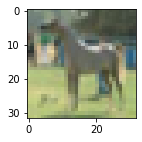

In [47]:
plt.figure(figsize = (15,2))
plt.imshow(x_train[2301])

<h1> 3. Normalisation des données d'entrainement </h1>

Pour normaliser une image avec 3 canaux (R, G, B) en utilisant une plage de 0 à 1.
<br>Chaque valeur dans chaque canal doit être divisée par 255.<br>
Cela permet de ramener chaque valeur dans chaque canal de 0 à 255 à une plage de 0 à 1

In [48]:
x_train = x_train/255.0
X_test = y_test/255.0

La fonction <b>to_categorical</b> permet de convertir les données de test "y_test" en catégories codées en utilisant 10 classes possibles (sortie).

In [49]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
Pour le modèle

In [52]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation='tanh', kernel_initializer='he_normal', padding='same'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='tanh', kernel_initializer='he_normal'))
model.add(keras.layers.Dense(10, activation='softmax'))

## Définition de l'algorithme d'apprentissage (optimizer) et de la quantité à minimiser
## (loss)
model.compile(optimizer=keras.optimizers.SGD(),
              loss=keras.losses.categorical_crossentropy,
              metrics=[keras.metrics.categorical_accuracy])

## Lancement de l'apprentissage
model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          epochs=5,
          batch_size=64)

Epoch 1/5
782/782 [==============================] - 97s 124ms/step - loss: 1.7344 - categorical_accuracy: 0.3775 - val_loss: 2.3834 - val_categorical_accuracy: 0.2817
Epoch 2/5
782/782 [==============================] - 100s 127ms/step - loss: 1.4139 - categorical_accuracy: 0.5022 - val_loss: 2.4230 - val_categorical_accuracy: 0.3026
Epoch 3/5
782/782 [==============================] - 100s 128ms/step - loss: 1.2693 - categorical_accuracy: 0.5533 - val_loss: 2.3624 - val_categorical_accuracy: 0.3036
Epoch 4/5
782/782 [==============================] - 96s 123ms/step - loss: 1.1598 - categorical_accuracy: 0.5946 - val_loss: 2.3260 - val_categorical_accuracy: 0.3231
Epoch 5/5
782/782 [==============================] - 98s 125ms/step - loss: 1.0793 - categorical_accuracy: 0.6229 - val_loss: 2.2894 - val_categorical_accuracy: 0.3295


Le modèle est initialisé en tant que <b>modèle séquentiel</b>, ce qui signifie que les couches du modèle sont construites les unes après les autres de manière séquentielle.

Le modèle comprend plusieurs couches de convolution 2D (Conv2D), suivies de couches de max pooling 2D (MaxPooling2D). Ces couches sont utilisées pour extraire des caractéristiques des données d'entrée sous forme d'images.

<b>Les couches de convolution 2D</b> appliquent un filtre sur chaque sous-région de l'image d'entrée et produisent une sortie de caractéristiques (également appelée "map de caractéristiques"). <br><b>La couche de max pooling 2D </b>suivante réduit la dimension de chaque map de caractéristiques en prenant le maximum de chaque sous-région de la map.

Le modèle comprend également une <b>couche de "aplatissement" (Flatten)</b>, qui prend une entrée de plusieurs maps de caractéristiques 2D et les "aplatit" en une seule entrée 1D.

Enfin, le modèle comprend une couche dense cachée de 128 neurones avec une fonction d'activation tanh et une couche de sortie de 10 neurones avec une fonction d'activation softmax. La couche de sortie produit une prédiction de classe pour chaque entrée sous forme de probabilité pour chaque classe possible.